# ASTR 19 Group Project
#### created by Ethan Domingo, Michelle Kwong and Wyatt Iles

### Importing the necessary libaries

#### In this case:
- Matplotlib.pyplot
- Numpy
- Scipy (specifically curve_fit feature)
- Math

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math

### Looking over and unpacking the data

In [3]:
with open('ASTR19_S22_group_project_data.txt') as f:
    lines = f.readlines()

lines

['#Column A: Day of the year\n',
 '#Column B: Time in hours:minutes\n',
 '#Column B: Tide Height in feet\n',
 ' 1  8:07  6.57\n',
 ' 1 15:37 -0.39\n',
 ' 2  8:55  5.38\n',
 ' 2 16:25 -1.74\n',
 ' 3  9:45  5.26\n',
 ' 3 17:14 -1.36\n',
 ' 4 10:35  4.13\n',
 ' 4 18:00 -1.15\n',
 ' 5 11:28  3.48\n',
 ' 5 18:46 -1.61\n',
 ' 6 12:22  2.62\n',
 ' 6 19:31  0.05\n',
 ' 7 13:24  1.83\n',
 ' 7 20:16  1.01\n',
 ' 8  3:22  3.57\n',
 ' 8 21:01  0.73\n',
 ' 9  4:07  4.54\n',
 ' 9 21:46  2.17\n',
 '10  4:50  3.76\n',
 '10 11:58  2.88\n',
 '11  5:31  3.90\n',
 '11 12:56  1.92\n',
 '12  6:08  4.73\n',
 '12 13:45  1.74\n',
 '13  6:47  5.66\n',
 '13 14:25  0.79\n',
 '14  7:22  5.33\n',
 '14 15:00 -0.04\n',
 '15  7:59  5.23\n',
 '15 15:34 -1.12\n',
 '16  8:34  6.67\n',
 '16 16:08 -0.61\n',
 '17  9:10  4.74\n',
 '17 16:41 -0.93\n',
 '18  9:45  4.69\n',
 '18 17:12 -1.29\n',
 '19 10:21  4.20\n',
 '19 17:45  0.22\n',
 '20 10:57  3.68\n',
 '20 18:15  0.26\n',
 '21 11:38  2.47\n',
 '21 18:48  0.36\n',
 '22 12:2

In [4]:
data = np.loadtxt('ASTR19_S22_group_project_data.txt', dtype = "str")

### Storing the data into three separate numpy arrays

The three main arrays used:
- day to mark the specific day
- time to mark the timestamp of the recording
- tide to measure the height of the tide

In [23]:
day, time, tide = [],[],[]

for d in data:
        day = np.append(day, int(d[0]), axis=None)
        time = np.append(time, d[1], axis=None)
        tide = np.append(tide, float(d[2]), axis=None)

print(day)
print(time)
print(tide)

[ 1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.  9.  9.
 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17. 18. 18.
 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26. 27. 27.
 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 35. 36. 36.
 37. 37. 38. 38. 39. 39. 40. 40. 41. 41.]
['8:07' '15:37' '8:55' '16:25' '9:45' '17:14' '10:35' '18:00' '11:28'
 '18:46' '12:22' '19:31' '13:24' '20:16' '3:22' '21:01' '4:07' '21:46'
 '4:50' '11:58' '5:31' '12:56' '6:08' '13:45' '6:47' '14:25' '7:22'
 '15:00' '7:59' '15:34' '8:34' '16:08' '9:10' '16:41' '9:45' '17:12'
 '10:21' '17:45' '10:57' '18:15' '11:38' '18:48' '12:25' '19:20' '2:22'
 '19:52' '2:58' '20:30' '3:37' '10:44' '4:23' '11:55' '5:15' '12:57'
 '6:09' '13:50' '7:05' '14:39' '7:58' '15:27' '8:50' '16:10' '9:40'
 '16:52' '10:30' '17:34' '11:19' '18:12' '12:10' '18:49' '1:32' '19:24'
 '2:13' '20:00' '2:54' '9:54' '3:39' '11:15' '4:29' '12:22' '5:21' '13:14']
[ 6.57 -0.39  5.38 -1.74  5.26 

### Finding an Oscillatory Function

We first played around a bunch with finding a regular oscillatory function that would work with the provided data set, originally starting with just a sin function and then further elaborating it over time. We then played around a bit more and noticed a way to account for the interchange in tide height over a two week period with this function defined below:

In [24]:
""" def oscillatory(day, time, tide):
    times = []
    for i in range(len(time)):
        t = float(time[i].replace(':', '.'))

        times.append(t)

    # DEFINED FUNCTION
    best_fit = [2*math.sin(times[i] / 4) * math.sin(times[i] / 6) + (math.sin(times[i] / 4) + 2) for i in range(len(times))]

    return best_fit """

" def oscillatory(day, time, tide):\n    times = []\n    for i in range(len(time)):\n        t = float(time[i].replace(':', '.'))\n\n        times.append(t)\n\n    best_fit = [2*math.sin(times[i] / 4) * math.sin(times[i] / 6) + (math.sin(times[i] / 4) + 2) for i in range(len(times))]\n\n    return best_fit "

And when plotted among on a graph with the data values:

In [7]:
""" best_fit = oscillatory(day, time, tide)

plt.plot(day, tide, day, best_fit)
plt.xlabel("Days")
plt.ylabel("Tide Height") """

' best_fit = oscillatory(day, time, tide)\n\nplt.plot(day, tide, day, best_fit)\nplt.xlabel("Days")\nplt.ylabel("Tide Height") '

With this in mind, we then decided to add more parameters and use scipy's curve-fit function to find better finding constants that fit the dataset:

In [8]:
def oscicllationFunc(x, a ,b, c, d, e):
    return a*np.sin(x / b) * np.sin(x / c) + (x / d) + e

We also made sure to redefine the time stamps as inputs for our function

In [9]:
times = []
for i in range(len(time)):
    t = float(time[i].replace(':', '.'))

    times.append(t)
times

[8.07,
 15.37,
 8.55,
 16.25,
 9.45,
 17.14,
 10.35,
 18.0,
 11.28,
 18.46,
 12.22,
 19.31,
 13.24,
 20.16,
 3.22,
 21.01,
 4.07,
 21.46,
 4.5,
 11.58,
 5.31,
 12.56,
 6.08,
 13.45,
 6.47,
 14.25,
 7.22,
 15.0,
 7.59,
 15.34,
 8.34,
 16.08,
 9.1,
 16.41,
 9.45,
 17.12,
 10.21,
 17.45,
 10.57,
 18.15,
 11.38,
 18.48,
 12.25,
 19.2,
 2.22,
 19.52,
 2.58,
 20.3,
 3.37,
 10.44,
 4.23,
 11.55,
 5.15,
 12.57,
 6.09,
 13.5,
 7.05,
 14.39,
 7.58,
 15.27,
 8.5,
 16.1,
 9.4,
 16.52,
 10.3,
 17.34,
 11.19,
 18.12,
 12.1,
 18.49,
 1.32,
 19.24,
 2.13,
 20.0,
 2.54,
 9.54,
 3.39,
 11.15,
 4.29,
 12.22,
 5.21,
 13.14]

Then we fit on a curve and we got the resulting constants for a, b, c, d and e

In [26]:
popt, pcov = curve_fit(oscicllationFunc, times, tide)
print(popt)

[ 4.87815859e+04 -1.11512514e+01  2.12213476e+04  4.29257831e-01
 -1.19069099e+00]


Then finally plotting the new found curve on the dataset we get:

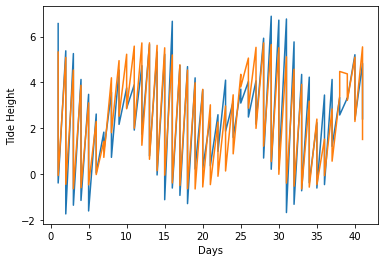

In [12]:
plt.plot(day, tide, label="data")
plt.plot(day, oscicllationFunc(times, *popt), label="best fit")
plt.xlabel("Days")
plt.ylabel("Tide Height")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.savefig("TidalMeasurements.pdf")

### Calculating Residuals

Residuals were calculated using the following code block below:

In [28]:
residuals = tide- oscicllationFunc(times, *popt)
print(residuals)


[ 1.24405825 -0.32666066  0.28816369 -1.29201729  0.7190479  -0.72135357
  0.25472376 -0.55440294  0.37188747 -1.14155145  0.32389802  0.0710637
  0.40098942  0.28156914 -0.63287891 -1.0794123  -0.41143331 -0.35523087
 -1.47058827  0.02928806 -1.68436896 -0.08255465 -0.99506655  0.48218888
 -0.06875141  0.14517913 -0.28855565 -0.18695812 -0.28164273 -1.07273212
  1.47011979 -0.22236648 -0.03089528 -0.43185877  0.1490479  -0.65315428
  0.21518106  0.87079374 -0.01947633  0.82253422 -0.55265603  0.82115831
  0.31989038  1.08533182  1.1282101   1.73516636 -0.28975061  0.71708018
 -0.64444583 -0.70387441 -1.02292962 -0.38657805 -1.46173934  0.18603382
  0.20428956 -0.5175828   1.2335875  -0.33544215  1.20503983  0.22907675
  1.65167311 -1.28489828  1.19508266 -0.7912366   0.43538226 -0.0800813
  1.04533393  0.18978608 -0.16016685 -0.15254317  1.92395376 -0.39109322
  1.28819194  0.64711774 -0.06804494 -1.8989248  -1.05401557  0.04143013
  0.10760164  0.09389802 -0.72244827  0.89830482]


Furthermore, we also found the $R^2$ value, which represents the value of how much the function fits the graph, with values closer to 1 being better

In [27]:
ss_res = np.sum(residuals**2)
ss_tot = np.sum((tide-np.mean(tide))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.8814756009892044

Plotting all the residuals on a histogram we get:

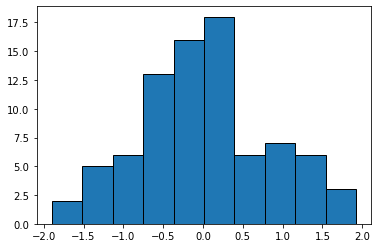

In [37]:
plt.hist(residuals, edgecolor='black')
plt.savefig("TidalHistogram.pdf")
plt.show()

### Tsunami Outlier

Now taking into account the tsunami, we first must calculate the value of the height of tsunami. This can be found be finding the max value of all the tides and adding 2 feet to it like so

In [30]:
maxVal = np.amax(tide)
tsunamiVal = maxVal + 2
tsunamiVal


8.89

Afterwards, we can calculate the residual with the single value and also the estimated timestamp, which is around 12.3

In [31]:
tsunamiXVal = 12.3
extraResid = tsunamiVal - oscicllationFunc(tsunamiXVal, *popt)
extraResid

6.663181972816805

With the residual being around 6.66, we can then calculate the number of standard deviations it is from the mean 

In [36]:
std = np.std(residuals)
numStds = extraResid/ std
numStds

8.129875935752624

Then plotting it onto a new histogram we get:

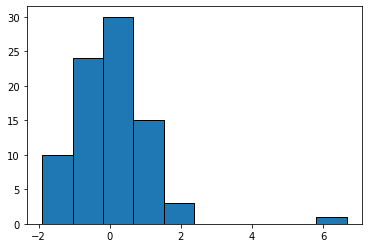

In [38]:
newResiduals = np.append(residuals, extraResid)
plt.hist(newResiduals, edgecolor='black')
plt.savefig("TidalHistogramOutlier.pdf")
plt.show()